In [102]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from sklearn.model_selection import GridSearchCV
from keras.optimizers import Adam
from keras import optimizers
from scikeras.wrappers import KerasClassifier
import matplotlib.pyplot as plt

In [73]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

Нормалізація значень пікселів до діапазону [0, 1]

In [74]:
train_data, test_data = train_data / 255.0, test_data / 255.0

In [75]:
train_data[0][10]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.75686275, 0.89411765,
       0.85490196, 0.83529412, 0.77647059, 0.70588235, 0.83137255,
       0.82352941, 0.82745098, 0.83529412, 0.8745098 , 0.8627451 ,
       0.95294118, 0.79215686, 0.        ])

Створення моделі

In [5]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))  # Перетворення 2D-масиву зображення (28, 28) в 1D-масив розміром 784
model.add(Dense(128, activation='relu'))   
model.add(Dropout(0.2))                   
model.add(Dense(10, activation='softmax')) 

In [6]:
model.compile(optimizer='adam',              
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [7]:
history = model.fit(train_data, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
750/750 [==============================] - 1s 1ms/step - loss: 0.5817 - accuracy: 0.7972 - val_loss: 0.4306 - val_accuracy: 0.8407
Epoch 2/10
750/750 [==============================] - 1s 1ms/step - loss: 0.4210 - accuracy: 0.8497 - val_loss: 0.3784 - val_accuracy: 0.8636
Epoch 3/10
750/750 [==============================] - 1s 1ms/step - loss: 0.3793 - accuracy: 0.8643 - val_loss: 0.3633 - val_accuracy: 0.8702
Epoch 4/10
750/750 [==============================] - 1s 1ms/step - loss: 0.3579 - accuracy: 0.8710 - val_loss: 0.3445 - val_accuracy: 0.8732
Epoch 5/10
750/750 [==============================] - 1s 1ms/step - loss: 0.3376 - accuracy: 0.8764 - val_loss: 0.3405 - val_accuracy: 0.8783
Epoch 6/10
750/750 [==============================] - 1s 1ms/step - loss: 0.3283 - accuracy: 0.8783 - val_loss: 0.3296 - val_accuracy: 0.8797
Epoch 7/10
750/750 [==============================] - 1s 1ms/step - loss: 0.3117 - accuracy: 0.8850 - val_loss: 0.3275 - val_accuracy: 0.8815
Epoch 

In [8]:
test_loss, test_acc = model.evaluate(test_data, test_labels)

313/313 [==============================] - 0s 517us/step - loss: 0.3495 - accuracy: 0.8768


In [22]:
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split


def create_model(neurons=128, learning_rate=0.001):
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(256, activation='relu'))
    model.add(Dense(neurons, activation='relu'))
    model.add(Dense(10, activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=64, verbose=0)

param_grid = {
    'neurons': [64, 128, 256],
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3)

grid_result = grid.fit(train_data, train_labels, validation_data=(test_data, test_labels))

print("Найкращі параметри: ", grid_result.best_params_)
print("Найкращий результат: ", grid_result.best_score_)


/tmp/ipykernel_17255/1910932512.py:20: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=20, batch_size=64, verbose=0)


625/625 [==============================] - 0s 539us/step
Найкращі параметри:  {'neurons': 128}
Найкращий результат:  0.8908


In [59]:
test_loss, test_acc = model.evaluate(test_data, test_labels)

313/313 [==============================] - 0s 839us/step - loss: 0.3345 - accuracy: 0.8889


In [100]:
model = Sequential()
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='PReLU'))
model.add(Dense(128, activation='PReLU'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='PReLU'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_data, train_labels, epochs=20, batch_size=256, validation_data=(test_data, test_labels))

Epoch 1/20
235/235 [==============================] - 2s 4ms/step - loss: 0.6387 - accuracy: 0.7753 - val_loss: 0.4754 - val_accuracy: 0.8286
Epoch 2/20
235/235 [==============================] - 1s 4ms/step - loss: 0.4088 - accuracy: 0.8531 - val_loss: 0.4007 - val_accuracy: 0.8574
Epoch 3/20
235/235 [==============================] - 1s 3ms/step - loss: 0.3577 - accuracy: 0.8699 - val_loss: 0.3818 - val_accuracy: 0.8624
Epoch 4/20
235/235 [==============================] - 1s 3ms/step - loss: 0.3350 - accuracy: 0.8778 - val_loss: 0.3776 - val_accuracy: 0.8634
Epoch 5/20
235/235 [==============================] - 1s 3ms/step - loss: 0.3164 - accuracy: 0.8827 - val_loss: 0.3435 - val_accuracy: 0.8761
Epoch 6/20
235/235 [==============================] - 1s 3ms/step - loss: 0.3014 - accuracy: 0.8881 - val_loss: 0.3383 - val_accuracy: 0.8775
Epoch 7/20
235/235 [==============================] - 1s 3ms/step - loss: 0.2882 - accuracy: 0.8934 - val_loss: 0.3364 - val_accuracy: 0.8814
Epoch 

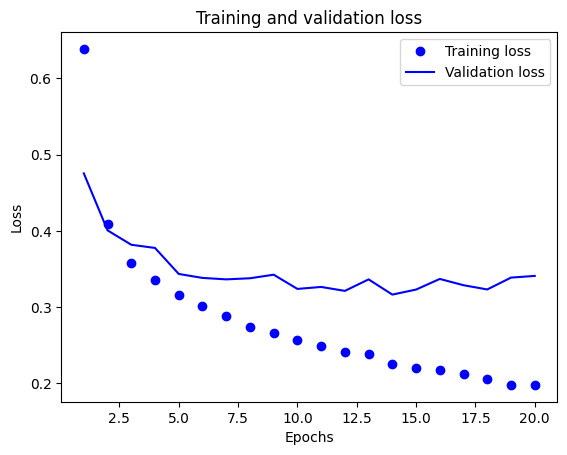

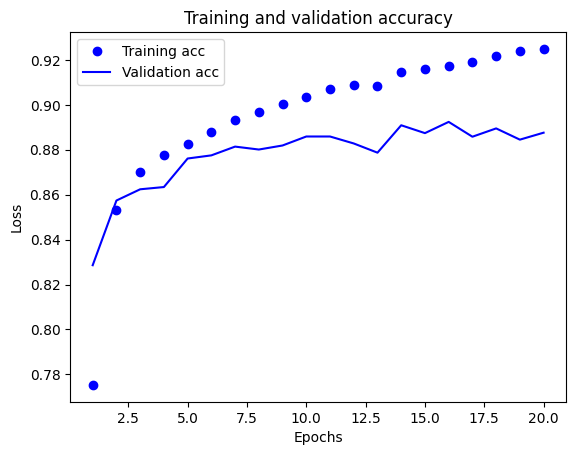

In [101]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()